# 1. Preparation of the dataset

Getting an extended dataset:

1. Get new data from https://www.bluebikes.com/system-data
2. Download the trip zip files for each month of 2019
3. Append them in one dataframe
4. Download current station data from website

All datasets used are provided.

## Libraries
Import the required libraries for later use.

In [164]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

import time
from datetime import datetime, timedelta


# For Google Maps script
import json
import urllib
import requests

## Meta settings

In [165]:
# For Google Maps script
API_KEY = ''
GOOGLE_MAPS_DATA_FILE = './datasets/google_api_data.json'

# Data provided
TRIP_DATA_PATH = './datasets/boston_2019.csv'
WEATHER_DATA_PATH = './datasets/weather_hourly_boston.csv'

# Station data from Blue Bikes website
STATION_DATA_PATH = './datasets/current_bluebikes_stations.csv'

# Load all csv for the different months in 2019 from Boston Bikes System Data
TRIP_DATA_WEBSITE_JANUARY = './datasets/csv/201901-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_FEBRUARY = './datasets/csv/201902-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_MARCH = './datasets/csv/201903-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_APRIL = './datasets/csv/201904-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_MAY = './datasets/csv/201905-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_JUNE = './datasets/csv/201906-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_JULY = './datasets/csv/201907-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_AUGUST = './datasets/csv/201908-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_SEPTEMBER = './datasets/csv/201909-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_OCTOBER = './datasets/csv/201910-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_NOVEMBER = './datasets/csv//201911-bluebikes-tripdata.csv'
TRIP_DATA_WEBSITE_DECEMBER = './datasets/csv/201912-bluebikes-tripdata.csv'


# Assign datatypes for each dataframe
TRIP_DTYPES = {
    'start_time': 'datetime64',
    'end_time': 'datetime64',
    'start_station_id': 'int64',
    'end_station_id': 'int',
    'start_station_name': 'str',
    'end_station_name': 'str',
    'bike_id': 'int64',
    'user_type': 'str',
}

TRIP_WEBSITE_DTYPES = {
    'trip_duration': 'int64',
    'start_time': 'datetime64',
    'stop_time': 'datetime64',
    'start_station_id': 'int64',
    'start_station_name': 'str',
    'start_station_lat': 'float64',
    'start_station_lng': 'float64',
    'end_station_id': 'int',
    'end_station_name': 'str',
    'end_station_lat': 'float64',
    'end_station_lng': 'float64',
    'bike_id': 'int64',
    'user_type': 'str',
    'birth_year': 'int64',
    'gender': 'int64',
    'user_type_id': 'int64'
}

WEATHER_DTYPES = {
    'max_temp': 'float64',
    'min_temp': 'float64',
    'precip': 'int64'
}

STATION_DTYPES = {
    'station_id_string': 'str',
    'station_name': 'str',
    'station_lat': 'float64',
    'station_lng': 'float64',
    'district': 'str',
    'total_docks': 'int64',
    'deployment_year': 'int64',
    'station_id': 'int64',
    'public': 'str',
    'station_id': 'int64'
}


## Loading the data
Here we load the data into our notebook. 

We haves 3 types of data:

1. Trip_data: data on individual trips, each represented by one record, such as time or station info
2. Weather_data: data on temperature and rain for each hour
3. Station_data: data for each station (e.g. number of docks or deployment year)

In [166]:
# Read all  provided csv data for trips, weather and stations into dataframes
trip_data = pd.read_csv(TRIP_DATA_PATH)
weather_data = pd.read_csv(WEATHER_DATA_PATH)


We also use station data from the Boston Bikes website, as it contains more information about each station that may be useful later, such as the number of docks or the year of deployment.

In [167]:
# Read all the stations csv data from the Blue Bikes website
station_data = pd.read_csv(STATION_DATA_PATH)

We use the trip data from the Boston Bikes website because it contains slightly more information about each trip, such as gender or year of birth.

We load the trip data for each month and then concat them into one dataframe.

In [168]:
# Read all csv trip data for each month into dataframes
trip_data_website_january = pd.read_csv(TRIP_DATA_WEBSITE_JANUARY)
trip_data_website_february = pd.read_csv(TRIP_DATA_WEBSITE_FEBRUARY)
trip_data_website_march = pd.read_csv(TRIP_DATA_WEBSITE_MARCH)
trip_data_website_april = pd.read_csv(TRIP_DATA_WEBSITE_APRIL)
trip_data_website_may = pd.read_csv(TRIP_DATA_WEBSITE_MAY)
trip_data_website_june = pd.read_csv(TRIP_DATA_WEBSITE_JUNE)
trip_data_website_july = pd.read_csv(TRIP_DATA_WEBSITE_JULY)
trip_data_website_august = pd.read_csv(TRIP_DATA_WEBSITE_AUGUST)
trip_data_website_september = pd.read_csv(TRIP_DATA_WEBSITE_SEPTEMBER)
trip_data_website_october = pd.read_csv(TRIP_DATA_WEBSITE_OCTOBER)
trip_data_website_november = pd.read_csv(TRIP_DATA_WEBSITE_NOVEMBER)
trip_data_website_december = pd.read_csv(TRIP_DATA_WEBSITE_DECEMBER)

In [169]:
# Concat datasets for each month from website into one dataframe
trip_data_website = pd.concat([trip_data_website_january, trip_data_website_february, trip_data_website_march, trip_data_website_april, trip_data_website_june, trip_data_website_july, trip_data_website_august, trip_data_website_september, trip_data_website_october, trip_data_website_november, trip_data_website_december], ignore_index=True)

## Modify the data
### Trip data
First, we rename the columns of the trip data from the website to appropriate names. Since there are only two types of users (subscribers and customers), we binarize them into their own column. This will make clustering easier later. Finally, we assign the dtypes.

In [170]:
# Rename headers of website trip data
trip_data_website = trip_data_website.rename(columns={'tripduration':'trip_duration', 'starttime':'start_time', 'stoptime':'stop_time', 'start station id':'start_station_id', 'start station name':'start_station_name', 'start station latitude':'start_station_lat', 'start station longitude':'start_station_lng', 'end station id':'end_station_id', 'end station name':'end_station_name', 'end station latitude':'end_station_lat', 'end station longitude':'end_station_lng', 'bikeid':'bike_id', 'usertype':'user_type', 'birth year':'birth_year', 'gender':'gender'})

# Binarize the user type into own column (Subscriber = 1, Customer = 0) for both trip_data and trip_data_website
print(trip_data_website['user_type'].unique())
trip_data_website['user_type_id'] = trip_data_website.apply(lambda row: 1 if row.user_type == 'Subscriber' else 0, axis=1)

['Subscriber' 'Customer']


In [171]:
# Assign dtype to trip data website
trip_data_website = trip_data_website.astype(TRIP_WEBSITE_DTYPES)

### Weather data
The weather data provided ranges from 2015 to 2022. Here we only need the data for 2019, so we filter the data by year and sort it by date.

In [172]:
# Set date_time to pandas datetime
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])

In [173]:
# Filter weather data for 2019
weather_data = weather_data[weather_data['date_time']<pd.to_datetime('2020-01-01 00:00:00')]
weather_data = weather_data[weather_data['date_time']>=pd.to_datetime('2019-01-01 00:00:00')]

# Sort weather data by date
weather_data = weather_data.sort_values(by='date_time')

For the weather data, we had to make some assumptions on how to interpret the data.

**Assumption 1**: For the duplicates, we assume that the weather changes throughout the hour. However, since we have no information on which part of the hour the weather changes, we take the first record of each duplicate.

**Assumption 2**: The time at which the ride begins is critical to the weather, since this is when the client decides to use the bike.

**Assumption 3**: Since some hours are missing in weather_data, we assume that the weather has not changed during this time. Therefore, we will fill these hours with the previous weather conditions. 

In [174]:
# Drop duplicates and keep first record
weather_data = weather_data.drop_duplicates(subset='date_time', keep='first')

# Generate all hours for 2019 and merge with weather data
hours_2019 = pd.DataFrame(pd.date_range(pd.to_datetime('2019-01-01 00:00:00'), pd.to_datetime('2019-12-31 23:00:00'), freq='H'), columns=['date_time'])
weather_all_hours = pd.merge(how='outer', left=weather_data, right=hours_2019, on='date_time').sort_values(by='date_time').reset_index(drop=True)

# Set date_time as index for dataframe
weather_all_hours = weather_all_hours.set_index('date_time')

# Fill missing values with forward fill and dtypes with backward fill
weather_all_hours = weather_all_hours.fillna(method='ffill')
weather_all_hours = weather_all_hours.fillna(method='bfill').astype(WEATHER_DTYPES)

Lastly, we will merge the weather data into the trip data, so each trip has the weather associated with it.

In [175]:
trip_data_website = pd.merge_asof(trip_data_website.sort_values('start_time'), weather_all_hours.sort_index(), left_on='start_time', right_index=True, direction='backward')

In [176]:
trip_data_website.head(1)

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,bike_id,user_type,birth_year,gender,user_type_id,max_temp,min_temp,precip
0,371,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1,1,5.6,5.6,1


### Station data
We can see that the header of station_data is not yet correct, the right values are in the first row. Therefore,  we need to set the first row as the header, delete the first record and reset the index. Then we will rename the columns to better fitting names.

In [177]:
station_data.head(1)

,Last Updated,12/5/2022,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year


In [178]:
# Set header to first row values
station_data.columns = station_data.iloc[0]

# Remove first row by slicing
station_data = station_data[1:]


In [179]:
# Reset index
station_data.reset_index(drop=True, inplace=True)

In [180]:
# Rename headers
station_data = station_data.rename(columns={'Number': 'station_id_string', 'Name': 'station_name', 'District': 'district', 'Total docks': 'total_docks', 'Deployment Year': 'deployment_year', 'Public': 'public', 'Latitude':'station_lat', 'Longitude':'station_lng'})

In [181]:
station_data.head(1)

,station_id_string,station_name,station_lat,station_lng,district,public,total_docks,deployment_year
0,K32015,1200 Beacon St,42.34414899,-71.11467361,Brookline,Yes,15,2021


Now we check the station data for missing values.

In [182]:
# Check for NaN in station_data
station_data[station_data.isnull().any(axis=1)]

,station_id_string,station_name,station_lat,station_lng,district,public,total_docks,deployment_year
7,S32049,515 Somerville Ave (Temp. Winter Location),42.38322727,-71.10606909,NaN,Yes,19,NaN
65,D32056,Boylston St at Charles St,42.35257609,-71.06764405,Boston,Yes,31,NaN
83,S32044,Broadway Opposite Norwood Ave (Temp Winter St...,42.396764,-71.102376,Somerville,Yes,15,NaN
236,M32083,John Ahern Field at Kennedy-Longfellow School,42.36903567,-71.0863096,NaN,Yes,19,NaN
262,G32003,Malden High School,42.42653766,-71.06393695,NaN,Yes,11,2022
302,T32015,North St at Liberty Hill Ave,42.52989965,-70.90614259,NaN,Yes,11,2022
401,S32042,Trum Field @ Cedar St (Temp Winter Station),42.398444,-71.107833,Somerville,Yes,19,NaN


In [183]:
# Check for NaN in each column
print('There are ' + str(station_data.isnull().sum().sum()) + ' missing values in total.')
print('There are ' + str(station_data['station_id_string'].isnull().sum()) + ' missing values in station id string.')
print('There are ' + str(station_data['station_name'].isnull().sum()) + ' missing values in station name.')
print('There are ' + str(station_data['station_lat'].isnull().sum()) + ' missing values in station lat.')
print('There are ' + str(station_data['station_lng'].isnull().sum()) + ' missing values in station lng.')
print('There are ' + str(station_data['district'].isnull().sum()) + ' missing values in district.')
print('There are ' + str(station_data['public'].isnull().sum()) + ' missing values in public.')
print('There are ' + str(station_data['total_docks'].isnull().sum()) + ' missing values in total docks.')
print('There are ' + str(station_data['deployment_year'].isnull().sum()) + ' missing values in deployment year.')

There are 9 missing values in total.
There are 0 missing values in station id string.
There are 0 missing values in station name.
There are 0 missing values in station lat.
There are 0 missing values in station lng.
There are 4 missing values in district.
There are 0 missing values in public.
There are 0 missing values in total docks.
There are 5 missing values in deployment year.


We can see that there are 9 missing values in total. 

Four of them in the district column. Therefore, we check where they appear and fill them with the correct value after a manual Google Maps search.



In [184]:
# Fill missing values with the correct district
station_data.loc[7].district='Somerville'
station_data.loc[236].district='Cambridge'
station_data.loc[262].district='Malden'
station_data.loc[302].district='Salem'

In [185]:
# Check district NaN
print('There are ' + str(station_data['district'].isnull().sum()) + ' missing values in district.')

There are 0 missing values in district.


For the deployment year, we can see that 3 of the 5 stations have a 'Temp Winter Station' in their name. We assume that they are only used in winter each year and therefore have the current year as their year of deployment - in this case 2022.

In [186]:
# Fill missing deployment years
station_data.loc[7].deployment_year=2022
station_data.loc[83].deployment_year=2022
station_data.loc[401].deployment_year=2022

In [187]:
# Check deployment NaN
print('There are ' + str(station_data['deployment_year'].isnull().sum()) + ' missing values in deployment year.')

There are 2 missing values in deployment year.


For the missing 2 values, we have no indication of when the year of deployment was. After searching the trip data for 'Boylston St at Charles St' and 'John Ahern Field at Kennedy-Longfellow School', we can see that there are no trips associated with either station.

In [188]:
# For both stations there are no results for the starting and ending station
print(trip_data_website[trip_data_website['start_station_name'].str.contains('Boylston St at Charles St')])
print(trip_data_website[trip_data_website['end_station_name'].str.contains('Boylston St at Charles St')])
print(trip_data_website[trip_data_website['start_station_name'].str.contains('John Ahern Field at Kennedy-Longfellow School')])
print(trip_data_website[trip_data_website['end_station_name'].str.contains('John Ahern Field at Kennedy-Longfellow School')])

Empty DataFrame
Columns: [trip_duration, start_time, stop_time, start_station_id, start_station_name, start_station_lat, start_station_lng, end_station_id, end_station_name, end_station_lat, end_station_lng, bike_id, user_type, birth_year, gender, user_type_id, max_temp, min_temp, precip]
Index: []
Empty DataFrame
Columns: [trip_duration, start_time, stop_time, start_station_id, start_station_name, start_station_lat, start_station_lng, end_station_id, end_station_name, end_station_lat, end_station_lng, bike_id, user_type, birth_year, gender, user_type_id, max_temp, min_temp, precip]
Index: []
Empty DataFrame
Columns: [trip_duration, start_time, stop_time, start_station_id, start_station_name, start_station_lat, start_station_lng, end_station_id, end_station_name, end_station_lat, end_station_lng, bike_id, user_type, birth_year, gender, user_type_id, max_temp, min_temp, precip]
Index: []
Empty DataFrame
Columns: [trip_duration, start_time, stop_time, start_station_id, start_station_name

Therefore, we delete both stations from station_data and reset the index.

In [189]:
# Drop Boylston St at Charles St (index=65) from station_data
station_data = station_data.drop([65])

# Drop John Ahern Field at Kennedy-Longfellow School (index=236) from station_data
station_data = station_data.drop([236])

# Reset index
station_data.reset_index(drop=True, inplace=True)

As shown below, there are now no missing values.

In [190]:
# Check for NaN
station_data[station_data.isnull().any(axis=1)]

,station_id_string,station_name,station_lat,station_lng,district,public,total_docks,deployment_year


We can see that there are more stations in station_data than stations are appearing in trip_data. Therefore, we extract the stations from trip_data and merge them with the information available in the station data.

In [191]:
# Check amount of stations in station_data and trip_data
print('There are ' + str(len(station_data['station_name'].unique())) + ' stations in the station data.')
print('There are ' + str(len(trip_data_website['start_station_id'].unique())) + ' start stations in trip data.')
print('There are ' + str(len(trip_data_website['end_station_id'].unique())) + ' end stations in trip data.')

There are 446 stations in the station data.
There are 338 start stations in trip data.
There are 339 end stations in trip data.


In [192]:
# Get all unique start and end stations
start_stations = trip_data_website.drop_duplicates(subset='start_station_id', keep='first')[['start_station_id','start_station_name', 'start_station_lat', 'start_station_lng']].sort_values(by='start_station_id').reset_index(drop=True)
end_stations = trip_data_website.drop_duplicates(subset='end_station_id', keep='first')[['end_station_id','end_station_name', 'end_station_lat', 'end_station_lng']].sort_values(by='end_station_id').reset_index(drop=True)

# Merge all unique start and end stations into one dataframe
all_stations = start_stations.merge(end_stations, left_on='start_station_id', right_on='end_station_id', how='outer', suffixes=['', '_'], indicator=True)

In [193]:
# Check for NaN in all_stations
all_stations[all_stations.isnull().any(axis=1)]

,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,_merge
202,229.0,8D QC Station 01,42.345033,-71.096649,NaN,NaN,NaN,NaN,left_only
278,383.0,MTL-ECO5.1-01,0.000000,0.000000,NaN,NaN,NaN,NaN,left_only
338,NaN,NaN,NaN,NaN,164.0,Warehouse Lab PBSC,42.386455,-71.07542,right_only
339,NaN,NaN,NaN,NaN,230.0,8D QC Station 02,0.000000,0.00000,right_only
340,NaN,NaN,NaN,NaN,382.0,MTL-ECO4-01,0.000000,0.00000,right_only


We can see that there are 5 stations with missing values - 2 start stations and 3 end stations. 

This means that the first two stations **only** appear as start stations and **never** appear as end stations, and the last 3 stations **only** appear as end stations and **never** appear as start stations, which explains the results above.

The samples where no values for latitude and longitude are given are problematic, here ***MTL-ECO5.1-01*** (start), ***8D QC Station 02*** (end) and ***MTL-ECO4-01*** (end).

We will now check in which of the trips the stations occur.

In [194]:
# # Check all trips for starting station: MTL-ECO5.1-01
# for index, row in trip_data_website.iterrows():
#     if 'MTL-ECO5.1-01' in row['start_station_name']:
#         print(index, row['start_station_name'], row['end_station_name'])

In [195]:
# # Check all trips for ending station: 8D QC Station 02
# for index, row in trip_data_website.iterrows():
#     if '8D QC Station 02' in row['end_station_name']:
#         print(index, row['start_station_name'], row['end_station_name'])

In [196]:
# # Check all trips for ending station: MTL-ECO4-01
# for index, row in trip_data_website.iterrows():
#     if 'MTL-ECO4-01' in row['end_station_name']:
#         print(index, row['start_station_name'], row['end_station_name'])

For ***MTL-ECO5.1-01*** (start) and ***MTL-ECO4-01*** (end) there is one trip with the ID ***994366***. 
For ***8D QC Station 02*** (end) there is a trip from ***8D QC Station 01*** (start) with the ID ***50153***.

We can also check with the stations dataset which of the stations above are appearing. We can neither find ***8D QC Station 02*** nor ***MTL-ECO4-01***. We can find ***MTL-ECO5.1-01*** and ***8D QC Station 01*** as listed stations.

For ***8D QC Station 01*** we have latitude and longitude values, but if there is only one occurrence in trip_data, it is not so important, so we check it as well.

In [197]:
# # Check all trips for starting station: 8D QC Station 01
# for index, row in trip_data_website.iterrows():
#     if '8D QC Station 01' in row['start_station_name']:
#         print(index, row['start_station_name'], row['end_station_name'])

Since there is only one trip associated with each of the stations (***8D QC Station 01***, ***8D QC Station 02***, ***MTL-ECO5.1-01***, and ***MTL-ECO4-01***), they do not seem important to the scope of the task. Therefore, the trips are deleted from the trip data.



In [198]:
# Drop trips by id 
trip_data_website = trip_data_website.drop([50153])
trip_data_website = trip_data_website.drop([994366])

# Reset index
trip_data_website.reset_index(drop=True, inplace=True)


Next, we remove the stations listed above from the all_stations dataframe.

In [199]:
# Drop stations by id (8D QC Station 01 id=202, MTL-ECO5.1-01 id=278, 8D QC Station 02 id=339, MTL-ECO4-01 id=340)
all_stations = all_stations.drop([202])
all_stations = all_stations.drop([278])
all_stations = all_stations.drop([339])
all_stations = all_stations.drop([340])

# Reset index
all_stations.reset_index(drop=True, inplace=True)

In [200]:
# Check for NaN
all_stations[all_stations.isnull().any(axis=1)]

,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,_merge
336,NaN,NaN,NaN,NaN,164.0,Warehouse Lab PBSC,42.386455,-71.07542,right_only


As there is one more end station than start station, we will use the end stations as the basis for our station data. 

We can omit the columns *start_station_id*, *start_station_name*, *start_station_lat* and *start_station_lng* because they provide the same information as the end station values. Then we rename the columns to appropriate names.

In [201]:
#  We will drop the columns start_station_id, start_station_name, start_station_lat, start_station_lng as they are not needed
all_stations = all_stations.drop(['start_station_id', 'start_station_name', 'start_station_lat', 'start_station_lng', '_merge' ], axis=1)

In [202]:
# Rename columns
all_stations = all_stations.rename(columns={'end_station_id': 'station_id', 'end_station_name': 'station_name', 'end_station_lat': 'station_lat', 'end_station_lng': 'station_lng'})

In [203]:
all_stations.head(1)

,station_id,station_name,station_lat,station_lng
0,1.0,18 Dorrance Warehouse,42.387151,-71.075978


Next, all the stations that show up in the trip data are merged into a new dataframe with the additional information we have about each station.

In [204]:
# Create new dataframe from station_data and all_stations
total_station_data = station_data.drop(['station_lat', 'station_lng'], axis=1).merge(all_stations, right_on='station_name', left_on='station_name', how='right')

Now we check again for missing values.

In [205]:
# Check for NaN
total_station_data[total_station_data.isnull().any(axis=1)]

,station_id_string,station_name,district,public,total_docks,deployment_year,station_id,station_lat,station_lng
0,NaN,18 Dorrance Warehouse,NaN,NaN,NaN,NaN,1.0,42.387151,-71.075978
18,NaN,Prudential Center - Belvedere St,NaN,NaN,NaN,NaN,21.0,42.346520,-71.080658
35,NaN,Boylston St at Arlington St,NaN,NaN,NaN,NaN,42.0,42.352567,-71.067705
40,NaN,Post Office Square - Pearl St at Milk St,NaN,NaN,NaN,NaN,48.0,42.356755,-71.055407
48,NaN,Dudley Square - Dudley St at Warren St,NaN,NaN,NaN,NaN,56.0,42.328540,-71.084165
49,NaN,Columbus Ave at Massachusetts Ave,NaN,NaN,NaN,NaN,57.0,42.340543,-71.081388
57,NaN,Allston Green District - Griggs St at Commonwe...,NaN,NaN,NaN,NaN,66.0,42.349225,-71.132753
70,NaN,Beacon St at Washington / Kirkland,NaN,NaN,NaN,NaN,79.0,42.378420,-71.105668
76,NaN,Brookline Village - Pearl Street at MBTA,NaN,NaN,NaN,NaN,86.0,42.332799,-71.116205
78,NaN,Inman Square at Vellucci Plaza / Hampshire St,NaN,NaN,NaN,NaN,88.0,42.374035,-71.101427


There are quite a few samples in the trip data from 2019 that are not included in the current list of stations. 

As we do not have more information about the stations even after checking the other station files from Boston Bikes website, we decide to fill the NaN data with proper values.

1) *total_docks* and *deployment_year* will be filled with -1, implying there is no info.
2) *station_id_string* will be filled with the predefined format (X00000).
3) For *public*, we noticed that the only values used are 'Yes' and 'nan'. Therefore, we assume that all known stations are public.
4) For *district*, we will perform a Google Maps search to fill the district info (see below).

In [206]:
# Fill station data station id string with format X000000
total_station_data['station_id_string'] = total_station_data['station_id_string'].fillna('X00000')

# Fill station data public with 'Yes'
total_station_data['public'] = total_station_data['public'].fillna('Yes')

# Fill station data deployment year and total docks with -1
total_station_data['deployment_year'] = total_station_data['deployment_year'].fillna(-1)
total_station_data['total_docks'] = total_station_data['total_docks'].fillna(-1)


In [207]:
# Check for missing values in total_station_data
total_station_data[total_station_data.isnull().any(axis=1)].head(1)

,station_id_string,station_name,district,public,total_docks,deployment_year,station_id,station_lat,station_lng
0,X00000,18 Dorrance Warehouse,NaN,Yes,-1,-1,1.0,42.387151,-71.075978


In [210]:
# Assign dtype to total_station_data station_id
total_station_data.station_id = total_station_data.station_id.astype('int64')

In [150]:
# # Script to lookup the station names in Google Maps through their Find Place API
# rows_with_nan = total_station_data[total_station_data.isnull().any(axis=1)]

# def get_google_place_data(stations):
#     station_info = {}
#     url_endpoint = 'https://maps.googleapis.com/maps/api/place/findplacefromtext/json'

#     for index, record in stations.iterrows():
#         url_query_params = f'?input={urllib.parse.quote_plus(record.station_name)}&inputtype=textquery&fields=formatted_address%2Cname%2Cgeometry&key={API_KEY}&point:42.387151,-71.075978'
#         url = url_endpoint + url_query_params
#         payload={}
#         headers = {}
#         response = requests.request('GET', url, headers=headers, data=payload)
#         response = json.loads(response.text)
#         if not response['candidates']:
#             print(f'--------{index}___{record.station_name}')
#             url_query_params = f'?input={urllib.parse.quote_plus(record.station_name)}&inputtype=textquery&fields=formatted_address%2Cname%2Cgeometry&key={API_KEY}'
#             url = url_endpoint + url_query_params
#             print(url)
#             response = requests.request('GET', url, headers=headers, data=payload)
#             response = json.loads(response.text)
#         station_info[record.station_id] = response
#     return station_info

# google_api_data = get_google_place_data(rows_with_nan)

# # Saving the data in a JSON-file

# with open(GOOGLE_MAPS_DATA_FILE, 'w') as fp:
#     json.dump(google_api_data, fp)


After checking the json file created via the Google Maps API and the station data (see below), we find that in most cases it works as expected. For some stations, the values are not correct, e.g. locations were found in the UK or other parts of the US. Therefore, we will override these values with a manual Google Maps search with latitude and longitude values.

In [208]:
# We will fill in some districts manually through their lat and long values as they were not found correct via the Google Maps Find Place API
total_station_data.at[18, 'district']='Boston' # Prudential Center - Belvedere St
total_station_data.at[44, 'district']='Boston' # Congress St at North St
total_station_data.at[57, 'district']='Boston' # Allston Green District - Griggs St at Commonwealth Ave
total_station_data.at[70, 'district']='Somerville' # Beacon St at Washington / Kirkland
total_station_data.at[76, 'district']='Brookline' # Brookline Village - Pearl Street at MBTA
total_station_data.at[78, 'district']='Cambridge' # Inman Square at Vellucci Plaza / Hampshire St
total_station_data.at[82, 'district']='Boston' # University of Massachusetts Boston - Integrated Sciences Complex 100
total_station_data.at[91, 'district']='Somerville' # Ball Sq
total_station_data.at[100, 'district']='Cambridge' # Harvard University Gund Hall at Quincy St / Ki...
total_station_data.at[160, 'district']='Cambridge' # Sidney Research Campus/ Erie Street at Waverly
total_station_data.at[171, 'district']='East Cambridge' # Child St at North St
total_station_data.at[174, 'district']='Boston' # Upham's Corner T Stop - Magnolia St at Dudley St
total_station_data.at[209, 'district']='Boston' # Washington St at Bradlee St
total_station_data.at[224, 'district']='Newton' # Washington St at Myrtle St
total_station_data.at[225, 'district']='Somerville' # 30 Dane St.
total_station_data.at[261, 'district']='Boston' #  Broadway T Stop W
total_station_data.at[280, 'district']='Everett' # Main Street at Carter Street
total_station_data.at[288, 'district']='Everett' # Wasgatt Playground
total_station_data.at[328, 'district']='Cambridge' # Mobile Temporary Station
total_station_data.at[335, 'district']='Boston' # Warehouse Lab PBSC

Now we fill the districts found via the Google Maps API for each station.

In [211]:
# Get all stations with missing district and load JSON data from above
rows_with_nan = total_station_data[total_station_data.isnull().any(axis=1)]
data = json.load(open(GOOGLE_MAPS_DATA_FILE))

# For each record with a missing district we lookup the corresponding station id in the JSON file
for index, row in rows_with_nan.iterrows():
    station_id = row.station_id
    json_station_data = data[str(station_id)]['candidates'][0]
    original_station = total_station_data[total_station_data.station_id == station_id]
    
    # We  split the data to find the district, as the addresses found are connected with a comma. 
    # Sometimes no direct address is provided, so we need to check the length of the split.
    # If the length is 4, an address is provided, if its 3, then no address is provided
    formatted_address = json_station_data['formatted_address'].split(',')
    district = formatted_address[0].strip() if len(formatted_address) == 3 else formatted_address[1].strip()

    # We will fill out the original dataframe with the JSON data
    total_station_data.at[total_station_data.station_id == station_id, 'district'] = district

In [212]:
# Check for missing values in total_station_data
total_station_data[total_station_data.isnull().any(axis=1)]

,station_id_string,station_name,district,public,total_docks,deployment_year,station_id,station_lat,station_lng


In [213]:
# Assign dtypes to stations
total_station_data = total_station_data.astype(STATION_DTYPES)

Now we count the trips for each station, so we can visualize it later on.

In [214]:
# Count amount of trips for starting and ending stations
start_station_count = pd.DataFrame(trip_data_website.start_station_id.value_counts())
end_station_count = pd.DataFrame(trip_data_website.end_station_id.value_counts())

# Rename columns to fitting names
start_station_count = start_station_count.rename(columns={'start_station_id':'start_station_count'})
end_station_count = end_station_count.rename(columns={'end_station_id':'end_station_count'})

# Merge station counts into station data
total_station_data = total_station_data.merge(start_station_count, right_index=True, left_on='station_id')
total_station_data = total_station_data.merge(end_station_count, right_index=True, left_on='station_id')

# Calculate total amount of trips for each station
total_station_data['total_station_count'] = total_station_data['start_station_count'] + total_station_data['end_station_count']

In [215]:
total_station_data.head(1)

,station_id_string,station_name,district,public,total_docks,deployment_year,station_id,station_lat,station_lng,start_station_count,end_station_count,total_station_count
0,X00000,18 Dorrance Warehouse,Boston,Yes,-1,-1,1,42.387151,-71.075978,459,1112,1571


The following data sets are the important ones for later use:

- **total_station_data**: all data provided on each station
- **trip_data_website**: all trips with weather data and station data

In [216]:
trip_data_website.head(1)

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,bike_id,user_type,birth_year,gender,user_type_id,max_temp,min_temp,precip
0,371,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1,1,5.6,5.6,1


# 2. Plotting the data

## KPIs
### Preparation
Before calculating the KPIs we need to prepare some variables used throughout this section.
Since the idea is to use these KPIs as a real time dashboard, we decided to use the current date and time as basis for the weather condition and pretend it to be in the year 2019. Based of this we were able to plot the last 24 hours of the 'current' date and compare it.

In [294]:
# Create bar chart out of a plot
def autolabelFloat(rects): 
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.- 0.2, 1.03*height, '%s' % '{:.2f}'.format(float(height)))

# Set the 'current' date and weather conditions
current_date = datetime.today().date()
current_time = datetime.today().time()

current_date_in_2019 = datetime(year=2019, month=current_date.month, day=current_date.day, hour=current_time.hour, minute=current_time.minute)

# Currently 2 degrees and no rain
current_rain_status = 0
current_temperature = 2.0

### KPI 1: Current utilization of complete fleet
The first KPI displays the current utilization of the fleet on a hourly basis of the last 24 hours. It compares the usage of the bikes in the last 24 hours compared to the usage throughout the year.

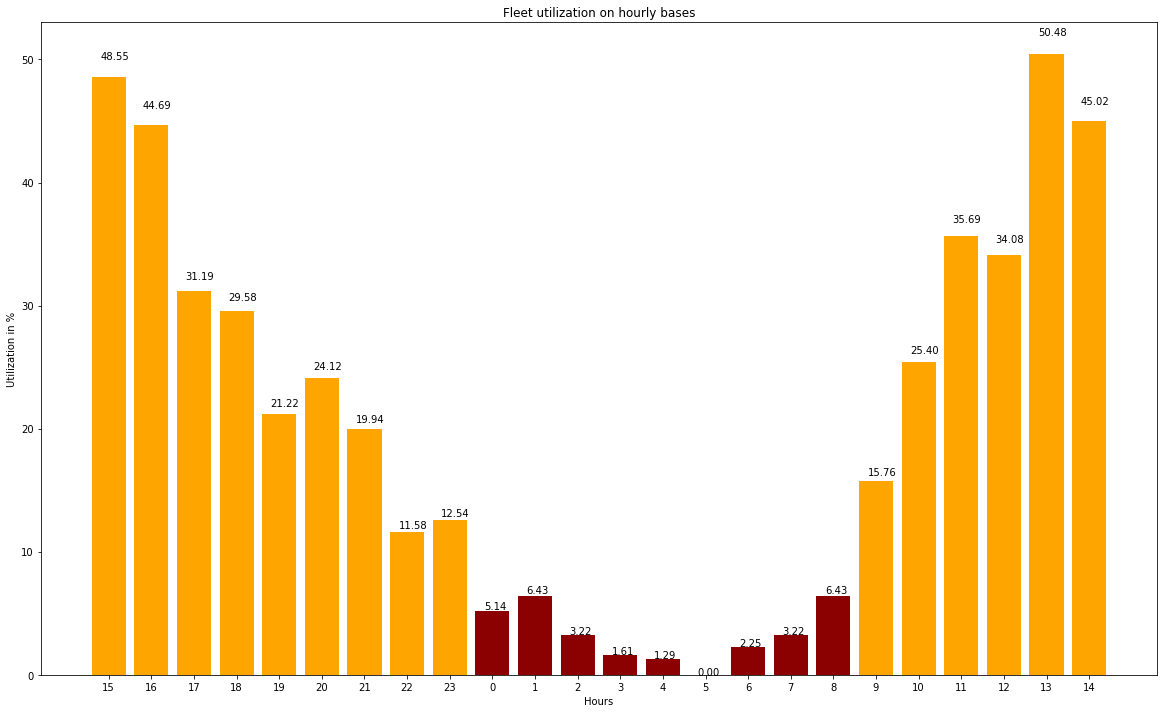

In [298]:
# Create dataframe for the result
result_kpi1_utilization = pd.DataFrame(columns=['time', 'utilization'])

# Get last 24 hours
last_24_hours = current_date_in_2019 - timedelta(hours=23)

# Get last 7 days
last_7_days = current_date_in_2019 - timedelta(days=7)

# Get number of vehicles used throughout 2019
bike_count = trip_data_website['bike_id'].groupby(trip_data_website['bike_id']).size().size

# Get number of vehicles used in the last 7 days
last_7_days_1 = trip_data_website['start_time'] >= last_7_days
last_7_days_2 = trip_data_website['start_time'] <= current_date_in_2019
last_7_days = last_7_days_1 & last_7_days_2
trips_last_7_days = trip_data_website.loc[last_7_days]
bike_count_last_7_days = trips_last_7_days['bike_id'].groupby(trips_last_7_days['bike_id']).size().size

# To-Do: optimalerweise mit utilization während der gleichen Zeit rechnen

# Calculate the utilization for the last 24 hours
for x in range(24):
    start_calculation = last_24_hours - timedelta(hours=1)
        
    trip_data_after = trip_data_website['start_time'] >= start_calculation
    trip_data_before = trip_data_website['start_time'] <= last_24_hours
    between_two_dates = trip_data_after & trip_data_before
    filtered_dates = trip_data_website.loc[between_two_dates] 
 
    filtered_dates_durations = filtered_dates['bike_id'].groupby(filtered_dates['bike_id']).size().size
    

    mean = (filtered_dates_durations / (bike_count_last_7_days/7)) * 100       
    hour = last_24_hours.hour
    
    result_kpi1_utilization = result_kpi1_utilization.append({'time': hour, 'utilization': mean}, ignore_index=True)
    
    
    last_24_hours = last_24_hours + timedelta(hours=1)


# now plot the data starting with the 23 hours ago till the current hour on the very right
fig = plt.figure(figsize=(20,12))
bins = result_kpi1_utilization['time'].astype('int32').values

# # Define masks
# util = 0
# mask_red = util < 10
# mask_orange = util > 10 & util < 30
# mask_yellow = util > 30 & util
# mask_green = util >= 80

plt.title('Fleet utilization on hourly bases')
plt.xlabel('Hours')
plt.ylabel('Utilization in %')
autolabelFloat(plt.bar(result_kpi1_utilization['time'].astype('int32').astype('str').values, result_kpi1_utilization['utilization'], color=np.where(result_kpi1_utilization['utilization']<10, 'darkred', 'orange'), tick_label=bins))
#plt.savefig('./figs/kpis/utilization.jpeg')
plt.show()

...

In [292]:
# trips_last_7_days['start_time'] = pd.to_timedelta(trips_last_7_days['start_time'].dt.hour, unit='H')


In [293]:
# trips_last_7_days.groupby(['bike_id']).size()

### KPI 2: Revenue
The KPI revenue shows the revenue made in the last 24 hours per hour in comparison to the average revenue made per hour. The input is the current precipitation, so you have a better comparison, since precipitation is presumably the biggest factor affecting revenue.

In [160]:
# Filter trips with(-out) precip for better comparison
# To-Do: filter customers & subscribers
precip = 0.0
revenue_daily = trip_data_website[['trip_duration', 'start_time', 'stop_time']].loc[(trip_data_website['precip'] == precip)]

# Calculate how often 30 min fits into trip duration
revenue_daily['count_payments'] = trip_data_website['trip_duration'].div(1800)

# Round values up/down 
revenue_daily['count_payments'] = revenue_daily['count_payments'].astype(int)

# Calculate total payment
revenue_daily['total_payment'] = 2.95 + revenue_daily['count_payments'] * 2.5

# Group by hours based on endtime bc thats were payment is fulfilled
revenue_daily['time'] = pd.to_timedelta(revenue_daily['stop_time'].dt.hour, unit='H')
result_revenue_daily = revenue_daily.groupby(['time']).size().reset_index(name='total_revenue_per_hour')

# Calculate daily average
result_revenue_daily['average_hourly_revenue'] = result_revenue_daily['total_revenue_per_hour'].div(365)

# Change time to hour only
result_revenue_daily['time'] = result_revenue_daily['time'].dt.components['hours']

In [161]:
# Get last 24h trips and calculate revenue per hour
result_kpi2_revenue = pd.DataFrame(columns=['time', 'revenue'])
loopDate = current_date_in_2019 - timedelta(hours=23)

# Calculate the revenue of the last 24 hours per hour
for x in range(24):
    start_calculation = loopDate - timedelta(hours=1)
    
    trip_data_after = revenue_daily['start_time'] >= start_calculation
    trip_data_before = revenue_daily['stop_time'] <= loopDate
    between_two_dates = trip_data_after & trip_data_before
    filtered_dates = revenue_daily.loc[between_two_dates]   
    filtered_dates_total_payment_sum = filtered_dates['total_payment'].sum()
       
    hour = loopDate.hour
    
    result_kpi2_revenue = result_kpi2_revenue.append({'time': hour, 'revenue': filtered_dates_total_payment_sum}, ignore_index=True)
    
    loopDate = loopDate + timedelta(hours=1)

# Calculate KPI: Last24h/Average per hour full year (with rain/without rain)
result_kpi_revenue = pd.merge(result_kpi2_revenue, result_revenue_daily, on='time')
result_kpi_revenue['kpi_revenue'] = result_kpi_revenue['revenue'] / result_kpi_revenue['average_hourly_revenue'] * 100

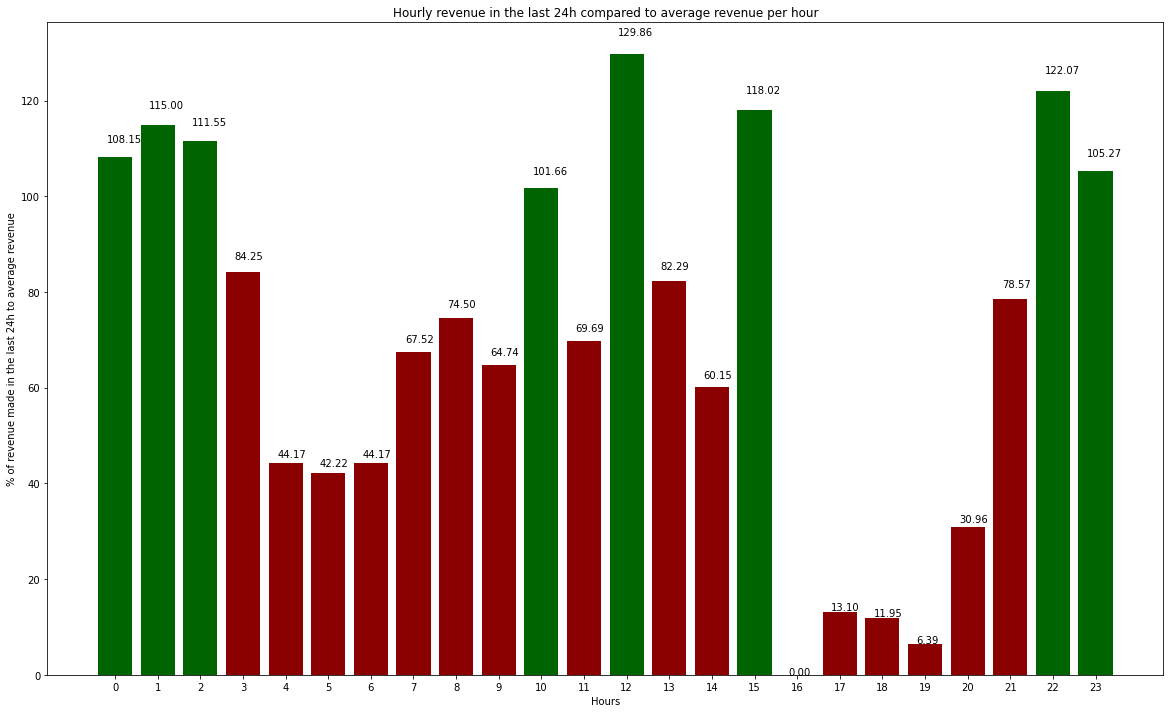

In [297]:
# Visualize KPI revenue
fig = plt.figure(figsize=(20,12))

count_values = result_kpi_revenue.count().time
bins = []
for i in range(count_values):
    bins.append(i)


# Change bins to time
autolabelFloat(plt.bar(bins, result_kpi_revenue['kpi_revenue'], color=np.where(result_kpi_revenue['kpi_revenue']>100, 'darkgreen', 'darkred'), tick_label=bins))
plt.ylabel('% of revenue made in the last 24h to average revenue')
plt.xlabel('Hours')
plt.title('Hourly revenue in the last 24h compared to average revenue per hour')

#plt.savefig('./figs/kpis/revenue.jpeg')

plt.show()

### KPI3: Coverage

trip_data_website

In [299]:
trip_data_website

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_lat,start_station_lng,end_station_id,end_station_name,end_station_lat,end_station_lng,bike_id,user_type,birth_year,gender,user_type_id,max_temp,min_temp,precip
0,371,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1,1,5.6,5.6,1
1,264,2019-01-01 00:33:56.182,2019-01-01 00:38:20.880,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,4142,Subscriber,1990,1,1,5.6,5.6,1
2,458,2019-01-01 00:41:54.600,2019-01-01 00:49:33.273,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1628,Subscriber,1977,1,1,5.6,5.6,1
3,364,2019-01-01 00:43:32.571,2019-01-01 00:49:37.426,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.391210,-71.122608,2969,Subscriber,1993,1,1,5.6,5.6,1
4,681,2019-01-01 00:49:56.464,2019-01-01 01:01:17.701,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,3469,Subscriber,1979,2,1,5.6,5.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299680,1562,2019-12-31 23:52:10.728,2020-01-01 00:18:13.418,22,South Station - 700 Atlantic Ave,42.352175,-71.055547,22,South Station - 700 Atlantic Ave,42.352175,-71.055547,4503,Customer,1995,1,0,3.3,3.3,0
2299681,2250,2019-12-31 23:52:14.927,2020-01-01 00:29:45.821,22,South Station - 700 Atlantic Ave,42.352175,-71.055547,22,South Station - 700 Atlantic Ave,42.352175,-71.055547,5326,Customer,1995,1,0,3.3,3.3,0
2299682,397,2019-12-31 23:54:58.391,2020-01-01 00:01:35.479,386,Sennott Park Broadway at Norfolk Street,42.368605,-71.099302,228,One Memorial Drive,42.361619,-71.080436,4483,Subscriber,1994,1,1,3.3,3.3,0
2299683,360,2019-12-31 23:55:54.544,2020-01-01 00:01:55.427,47,Cross St at Hanover St,42.362811,-71.056067,98,Warren St at Chelsea St,42.371848,-71.060292,3955,Subscriber,1965,1,1,3.3,3.3,0
